## Problem Statenent

Using the latest data, find out the best pinch hitters inside PP in the IPL so far (min of 20 ings). Use MCDM and Saaty Scale to come up with the answer.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('all_matches.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                260920 non-null  int64  
 1   season                  260920 non-null  object 
 2   start_date              260920 non-null  object 
 3   venue                   260920 non-null  object 
 4   innings                 260920 non-null  int64  
 5   ball                    260920 non-null  float64
 6   batting_team            260920 non-null  object 
 7   bowling_team            260920 non-null  object 
 8   striker                 260920 non-null  object 
 9   non_striker             260920 non-null  object 
 10  bowler                  260920 non-null  object 
 11  runs_off_bat            260920 non-null  int64  
 12  extras                  260920 non-null  int64  
 13  wides                   8381 non-null    float64
 14  noballs             

## Fields required

Batsman, runs, fours, sixes, innings, dismissal, RPI, Strike Rate, BPD, BPB, dot percentage.

RPI - Runs per innings BPD - Balls per dismissal  
BPB - Balls per bpondary

We have to generate this from a table that has data of all the balls bowled in IPL

In [23]:
dfCopy = df.copy()
dfCopy['one'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
dfCopy['two'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
dfCopy['three'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
dfCopy['four'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
dfCopy['six'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
dfCopy['dot'] = dfCopy['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)

In [24]:
dfCopy[['over done', 'ball no']] = df['ball'].astype('string').str.split('.', n=1, expand=True)

In [25]:
def getphase(over_done):
    if over_done <= 5:
        return 'powerplay'
    elif over_done <=14:
        return 'middle'
    else:
        return 'end'

In [26]:
dfCopy['phase'] = dfCopy['over done'].astype('int').apply(getphase)

In [27]:
dfCopy = dfCopy[dfCopy['phase'] == 'powerplay']

In [28]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81905 entries, 0 to 260892
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                81905 non-null  int64  
 1   season                  81905 non-null  object 
 2   start_date              81905 non-null  object 
 3   venue                   81905 non-null  object 
 4   innings                 81905 non-null  int64  
 5   ball                    81905 non-null  float64
 6   batting_team            81905 non-null  object 
 7   bowling_team            81905 non-null  object 
 8   striker                 81905 non-null  object 
 9   non_striker             81905 non-null  object 
 10  bowler                  81905 non-null  object 
 11  runs_off_bat            81905 non-null  int64  
 12  extras                  81905 non-null  int64  
 13  wides                   2779 non-null   float64
 14  noballs                 325 non-null    fl

In [29]:
df_runs = dfCopy.groupby('striker')['runs_off_bat'].sum().reset_index()
df_runs.rename(columns={'runs_off_bat':'runs'}, inplace=True)
df_runs.rename(columns={'striker':'batsman'}, inplace=True)

fours = dfCopy.groupby('striker')['four'].sum().reset_index()
fours.rename(columns={'four':'fours'}, inplace=True)
fours.rename(columns={'striker':'batsman'}, inplace=True)

sixes = dfCopy.groupby('striker')['six'].sum().reset_index()
sixes.rename(columns={'six':'sixes'}, inplace=True)
sixes.rename(columns={'striker':'batsman'}, inplace=True)

innings = dfCopy.groupby('striker')['match_id'].nunique().reset_index()
innings.rename(columns={'match_id':'innings'}, inplace=True)
innings.rename(columns={'striker':'batsman'}, inplace=True)

balls = dfCopy.groupby('striker', as_index=False)['match_id'].count()
balls.rename(columns={'match_id':'balls'}, inplace=True)
balls.rename(columns={'striker':'batsman'}, inplace=True)

dot = dfCopy.groupby('striker')['dot'].sum().reset_index()
dot.rename(columns={'dot':'dot balls'}, inplace=True)
dot.rename(columns={'striker':'batsman'}, inplace=True)

players_dismissed = dfCopy['player_dismissed'].value_counts().reset_index()
players_dismissed.rename(columns={'player_dismissed':'batsman', 'count': 'dismissed'}, inplace=True)

total = pd.merge(df_runs, innings, on='batsman', how='left')
total = pd.merge(total, balls, on='batsman', how='left')
total = pd.merge(total, players_dismissed, on='batsman', how='left')
total.dismissed.fillna(0, inplace=True)
total = pd.merge(total, fours, on='batsman', how='left')
total = pd.merge(total, sixes, on='batsman', how='left')
total = pd.merge(total, dot, on='batsman', how='left')
total.sort_values(by=['runs'], ascending=False)


,batsman,runs,innings,balls,dismissed,fours,sixes,dot balls
272,S Dhawan,3415,214,2862,95.0,455,76,1329
76,DA Warner,3318,176,2501,77.0,432,105,1182
337,V Kohli,2809,194,2347,66.0,348,68,1056
67,CH Gayle,2405,135,1851,65.0,267,145,1017
30,AM Rahane,2319,157,2013,70.0,302,49,959
...,...,...,...,...,...,...,...,...
174,M Rawat,0,1,2,1.0,0,0,2
293,SN Thakur,0,1,4,1.0,0,0,4
125,JC Archer,0,1,4,1.0,0,0,4
105,GD Phillips,0,1,7,0.0,0,0,7


In [30]:
def ballsPerBoundary(balls, boundary):
    if boundary == 0:
        return balls
    else:
        return balls/boundary

def ballsPerDismissal(balls, dismissal):
    if dismissal == 0:
        return balls
    else:
        return balls/dismissal


In [31]:
total['RPI'] = total['runs']/total['innings']
total['SR'] = total['runs']*100/total['balls']
total['BPB'] = total.apply(lambda x: ballsPerBoundary(x['balls'], x['fours']+x['sixes']), axis=1)
total['BPD'] = total.apply(lambda x: ballsPerDismissal(x['balls'], x['dismissed']), axis=1)
total

,batsman,runs,innings,balls,dismissed,fours,sixes,dot balls,RPI,SR,BPB,BPD
0,A Ashish Reddy,5,1,7,1.0,1,0,5,5.000000,71.428571,7.000000,7.000000
1,A Badoni,18,7,38,3.0,2,0,27,2.571429,47.368421,19.000000,12.666667
2,A Chopra,27,5,41,3.0,4,0,26,5.400000,65.853659,10.250000,13.666667
3,A Flintoff,14,1,15,0.0,1,1,11,14.000000,93.333333,7.500000,15.000000
4,A Manohar,12,2,18,1.0,2,0,12,6.000000,66.666667,9.000000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
357,YV Takawale,121,8,137,5.0,19,1,88,15.125000,88.321168,6.850000,27.400000
358,Yashpal Singh,17,2,37,1.0,2,0,28,8.500000,45.945946,18.500000,37.000000
359,Younis Khan,3,1,7,1.0,0,0,4,3.000000,42.857143,7.000000,7.000000
360,Yuvraj Singh,193,33,197,12.0,26,5,115,5.848485,97.969543,6.354839,16.416667


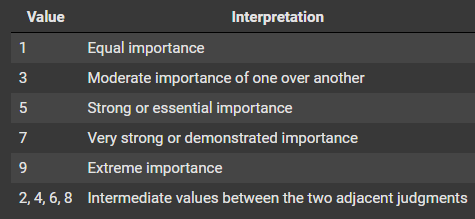

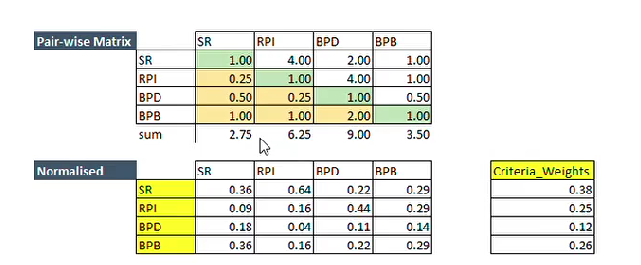

Since a pinch hitters role is considered Strike rate and BPB are considered more important, Runs per innings is of strong importance compared to Balls per dismissal

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
total['SRC'] = total['SR'].values
total['RPIC'] = total['RPI'].values
total['BPDC'] = total['BPD'].values
total['BPBC'] = total['BPB'].values
columns = ['SRC','RPIC', 'BPDC','BPBC']

totalnp = scaler.fit_transform(total[columns])
total[columns] = pd.DataFrame(totalnp, columns=columns)

In [33]:
pip install topsispy

In [34]:
import topsispy as tp
evaluation_matrix = total[columns].values

weights = [0.38,0.25,0.12,0.26]
sign = [1, 1, 1, -1]
res = tp.topsis(evaluation_matrix, weights, sign)

In [35]:
total['score'] = res[1]

In [36]:
total.sort_values(by='score', ascending=False)

,batsman,runs,innings,balls,dismissed,fours,sixes,dot balls,RPI,SR,BPB,BPD,SRC,RPIC,BPDC,BPBC,score
123,J Fraser-McGurk,266,9,112,6.0,31,21,45,29.555556,237.500000,2.153846,18.666667,0.678571,0.985185,0.207843,0.041209,0.734337
148,KK Cooper,7,1,2,0.0,0,1,0,7.000000,350.000000,2.000000,2.000000,1.000000,0.233333,0.011765,0.035714,0.700769
68,CH Morris,17,1,7,0.0,2,1,2,17.000000,242.857143,2.333333,7.000000,0.693878,0.566667,0.070588,0.047619,0.683461
313,Shahid Afridi,43,3,18,2.0,4,3,6,14.333333,238.888889,2.571429,9.000000,0.682540,0.477778,0.094118,0.056122,0.667698
331,TM Head,412,20,211,8.0,53,22,77,20.600000,195.260664,2.813333,26.375000,0.557888,0.686667,0.298529,0.064762,0.660426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,DJ Thornely,4,3,21,1.0,0,0,17,1.333333,19.047619,21.000000,21.000000,0.054422,0.044444,0.235294,0.714286,0.173093
264,RT Ponting,45,9,75,5.0,2,1,45,5.000000,60.000000,25.000000,15.000000,0.171429,0.166667,0.164706,0.857143,0.161070
312,Shahbaz Ahmed,21,6,27,3.0,0,1,14,3.500000,77.777778,27.000000,9.000000,0.222222,0.116667,0.094118,0.928571,0.160934
196,MN Samuels,9,4,26,1.0,1,0,20,2.250000,34.615385,26.000000,26.000000,0.098901,0.075000,0.294118,0.892857,0.119039


In [37]:
total_new = total[total['innings']>=20]

In [39]:
with pd.option_context("display.max_rows", 1000):
    display(total_new.sort_values(by='score', ascending=False))


,batsman,runs,innings,balls,dismissed,fours,sixes,dot balls,RPI,SR,BPB,BPD,SRC,RPIC,BPDC,BPBC,score
331,TM Head,412,20,211,8.0,53,22,77,20.600000,195.260664,2.813333,26.375000,0.557888,0.686667,0.298529,0.064762,0.660426
354,YBK Jaiswal,1009,52,677,26.0,149,36,328,19.403846,149.039882,3.659459,26.038462,0.425828,0.646795,0.294570,0.094981,0.591667
298,SP Narine,946,58,577,44.0,119,55,288,16.310345,163.951473,3.316092,13.113636,0.468433,0.543678,0.142513,0.082718,0.590439
40,Abhishek Sharma,758,40,501,21.0,90,35,218,18.950000,151.297405,4.008000,23.857143,0.432278,0.631667,0.268908,0.107429,0.588428
65,CA Lynn,779,40,553,17.0,99,37,271,19.475000,140.867993,4.066176,32.529412,0.402480,0.649167,0.370934,0.109506,0.583397
133,JM Bairstow,864,47,606,20.0,113,34,279,18.382979,142.574257,4.122449,30.300000,0.407355,0.612766,0.344706,0.111516,0.579403
98,E Lewis,420,22,298,13.0,49,21,145,19.090909,140.939597,4.257143,22.923077,0.402685,0.636364,0.257919,0.116327,0.573824
126,JC Buttler,1613,87,1189,40.0,207,65,580,18.540230,135.660219,4.371324,29.725000,0.387601,0.618008,0.337941,0.120404,0.569246
76,DA Warner,3318,176,2501,77.0,432,105,1182,18.852273,132.666933,4.657356,32.480519,0.379048,0.628409,0.370359,0.130620,0.566289
237,PP Shaw,1347,79,946,52.0,193,37,416,17.050633,142.389006,4.113043,18.192308,0.406826,0.568354,0.202262,0.111180,0.565705
